![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install livelossplot

In [3]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from livelossplot import PlotLossesKeras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras import backend as K
from keras import initializers
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [4]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


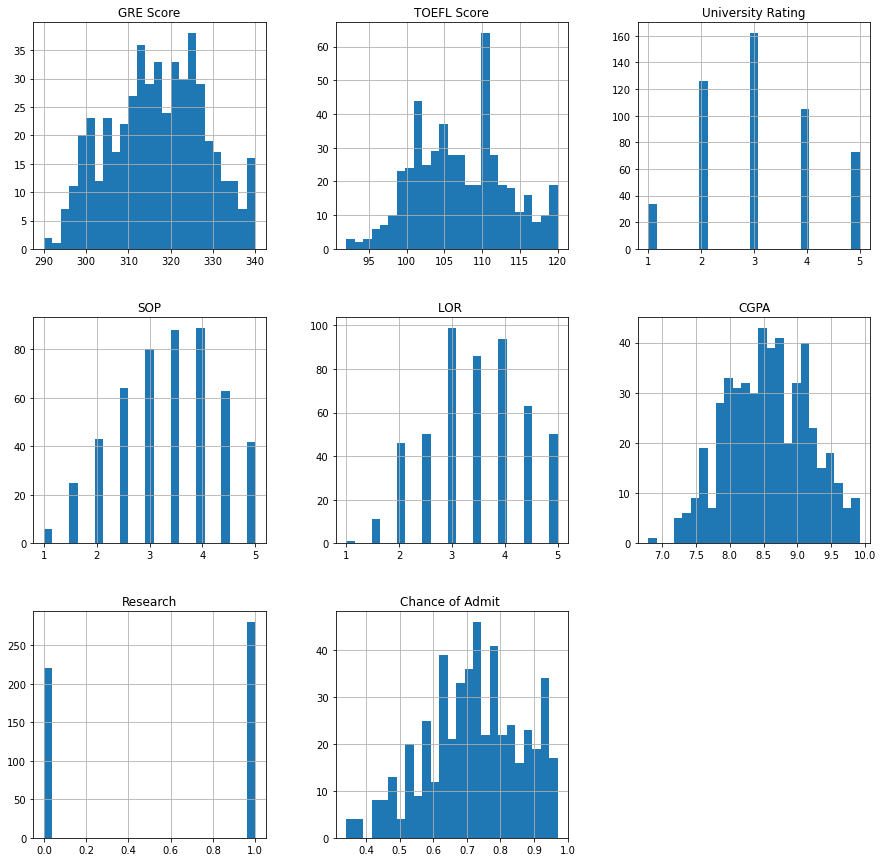

In [4]:
# Histogramas de las variables del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [5]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [6]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usando la función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

In [7]:
# Definición de la función StandardScaler // Siempre se debe hacer normalización
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
xTrain = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
xTest = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

xTrain = np.array(xTrain)
yTrain = np.array(yTrain)

xTest = np.array(xTest)
yTest = np.array(yTest)

dims = xTrain.shape[1]
output_var = 1

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

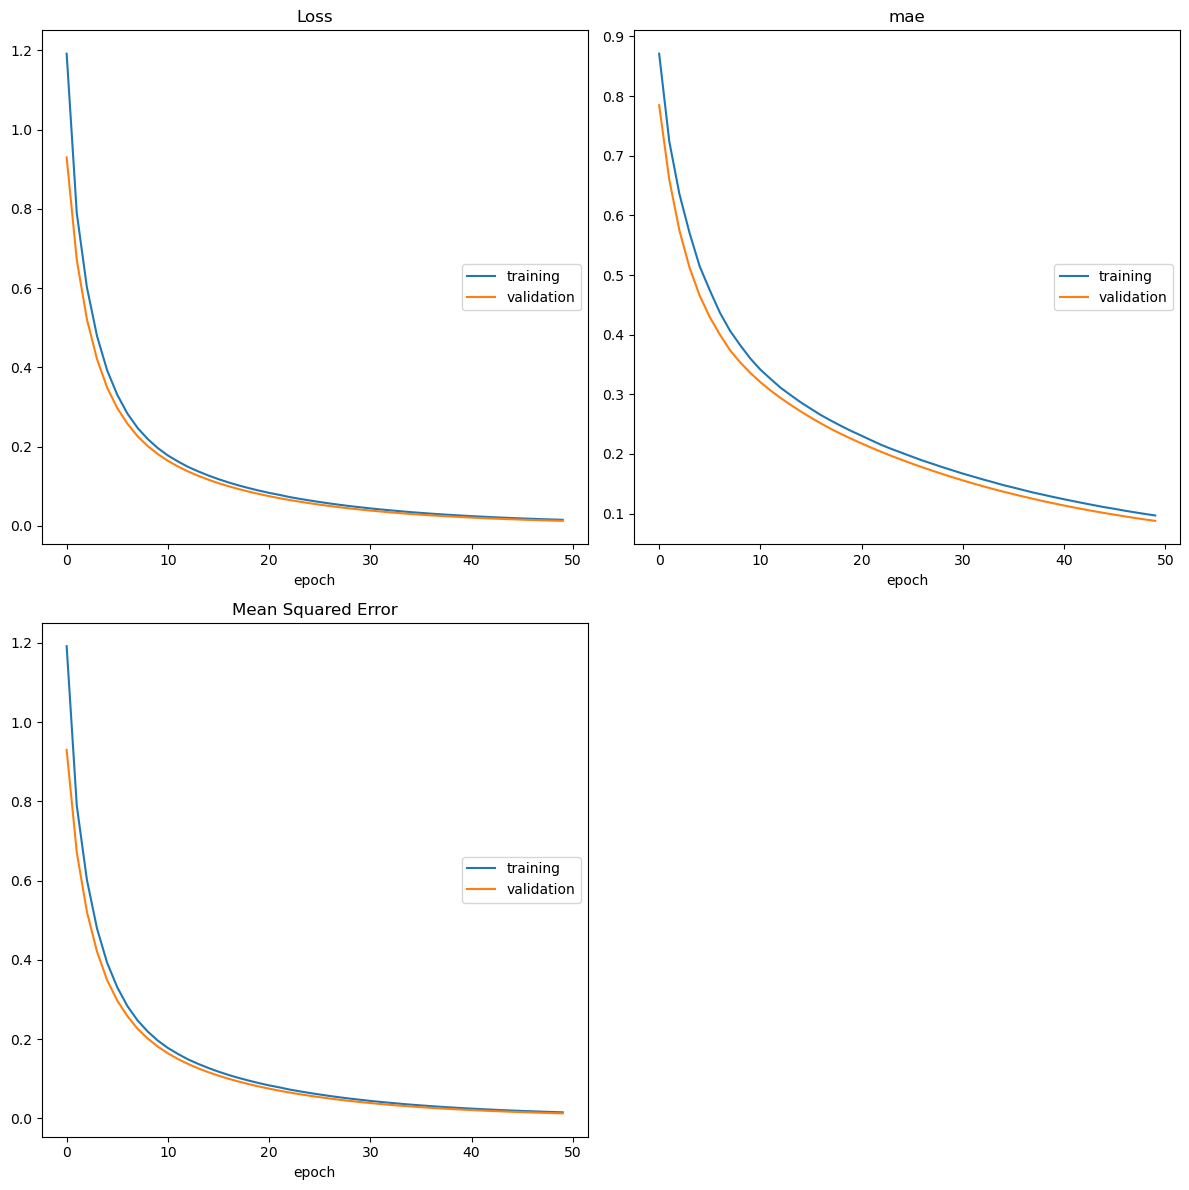

Loss
	training         	 (min:    0.015, max:    1.192, cur:    0.015)
	validation       	 (min:    0.013, max:    0.930, cur:    0.013)
mae
	training         	 (min:    0.097, max:    0.871, cur:    0.097)
	validation       	 (min:    0.088, max:    0.785, cur:    0.088)
Mean Squared Error
	training         	 (min:    0.015, max:    1.192, cur:    0.015)
	validation       	 (min:    0.013, max:    0.930, cur:    0.013)
5/5 [==============================] - 0s 5ms/step - loss: 0.0125 - mae: 0.0878 - mse: 0.0125
Mean Absolute Error (MAE): 0.0878 | Mean Squared Error (MSE): 0.0125


In [8]:
# Celda 1
# Definición red neuronal con la función Sequential()
K.clear_session()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))
# print(model.summary())

# Pueden usar la función de pérdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección
# Optimizadores disponibles: https://keras.io/api/optimizers/
# Funciones de pérdida disponibles para regresión: https://keras.io/api/losses/regression_losses/
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mae', 'mse'])

# Entrenamiento de la red neuronal con 50 épocas
model.fit(xTrain, yTrain, verbose=1, epochs=50, validation_data=(xTest, yTest), callbacks=[PlotLossesKeras()])

# Presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE)
loss, mae, mse = model.evaluate(xTest, yTest)
print(f"Mean Absolute Error (MAE): {mae:.4f} | Mean Squared Error (MSE): {mse:.4f}")

# Comentarios

> - Inicialmente se usó gridSearchCV (no incluido para no hacer extenso el notebook) para evaluar el desempeño de los 10 optimizadores ofrecidos por Keras (SGD, RMSprop, Adam, AdamW, Adadelta, Adagrad, Adamax, Adafactor, Nadam y Ftrl), encontrando que el de mejor desempeño fue sgd para este caso de regresion.

> - Se eligió evaluar la pérdida por medio de la función de costo MSE *mean squared error* porque, en este caso de regresión, se centra en la magnitud de los errores y penaliza de manera más fuerte los errores grandes.

> - Tras determinar que el mejor optimizador para este caso era *Stochastic Gradient Descendent* (sgd) se realizó la busqueda del mejor parámetro de epoch encontrando que, a partir de 50, la pérdida ya no disminuía más.

> - Para la pérdida de entrenamiento, el valor más alto que se alcanzó durante todas las épocas fue superior a 1.1, mientras que el valor más bajo fue inferior a 0.02.

> - Para la pérdida de validación, el valor más alto que se alcanzó durante todas las épocas fue superior a 0.9, mientras que el valor más bajo fue inferior a 0.015.

> - Podría considerarse como bueno el desempeño de este modelo dado que el valor de pérdida es muy pequeño (0.0031) y llegan a ser muy similares entre el set de entrenamiento y el de validación.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

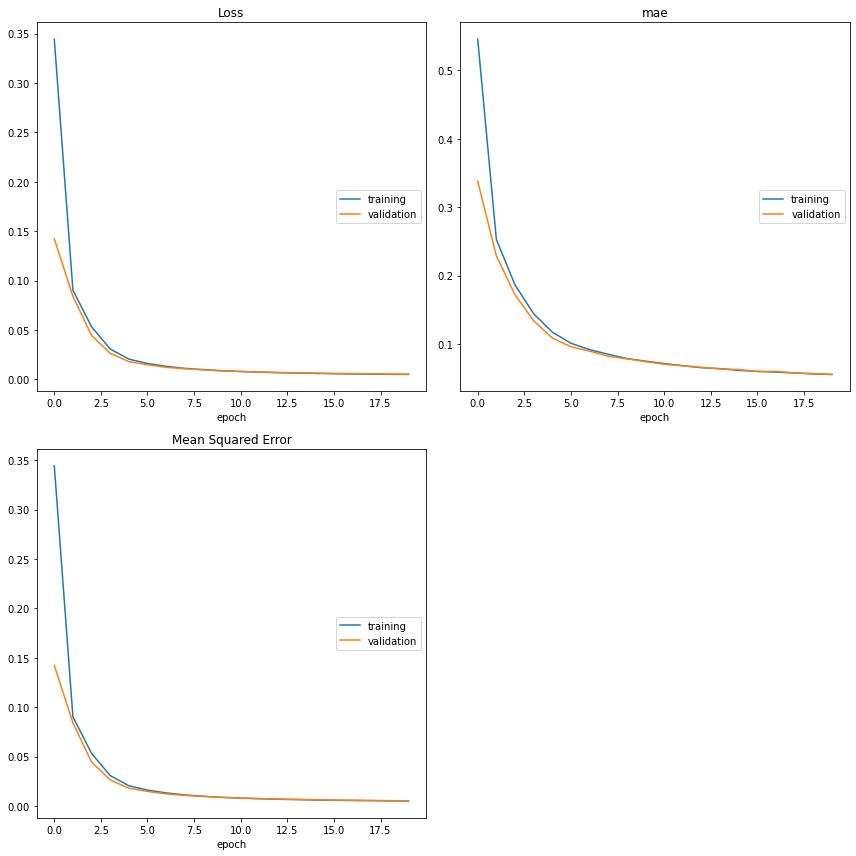

Loss
	training         	 (min:    0.005, max:    0.344, cur:    0.005)
	validation       	 (min:    0.005, max:    0.142, cur:    0.005)
mae
	training         	 (min:    0.056, max:    0.545, cur:    0.056)
	validation       	 (min:    0.056, max:    0.338, cur:    0.056)
Mean Squared Error
	training         	 (min:    0.005, max:    0.344, cur:    0.005)
	validation       	 (min:    0.005, max:    0.142, cur:    0.005)
5/5 [==============================] - 0s 3ms/step - loss: 0.0052 - mae: 0.0557 - mse: 0.0052
Mean Absolute Error (MAE): 0.0557 | Mean Squared Error (MSE): 0.0052


In [51]:
# Celda 2

# Limpiamos la sesión para no ocupar tanta memoria
K.clear_session()

# Definimos una red neuronal con la función Sequential()
model = Sequential()

# Definimos capas densas con un tamaño de salida de 
model.add(Dense(512, activation='relu', input_dim = xTrain.shape[1])) # Me queda la duda del papel de input_dim (¿es distinto de input_shape?)
model.add(Dense(256, activation='linear')) # ¿Por qué linear?
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mae', 'mse'])

model.fit(xTrain, yTrain, verbose=1, epochs=20, validation_data=(xTest, yTest), callbacks=[PlotLossesKeras()])

loss, mae, mse = model.evaluate(xTest, yTest)
print(f"Mean Absolute Error (MAE): {mae:.4f} | Mean Squared Error (MSE): {mse:.4f}")

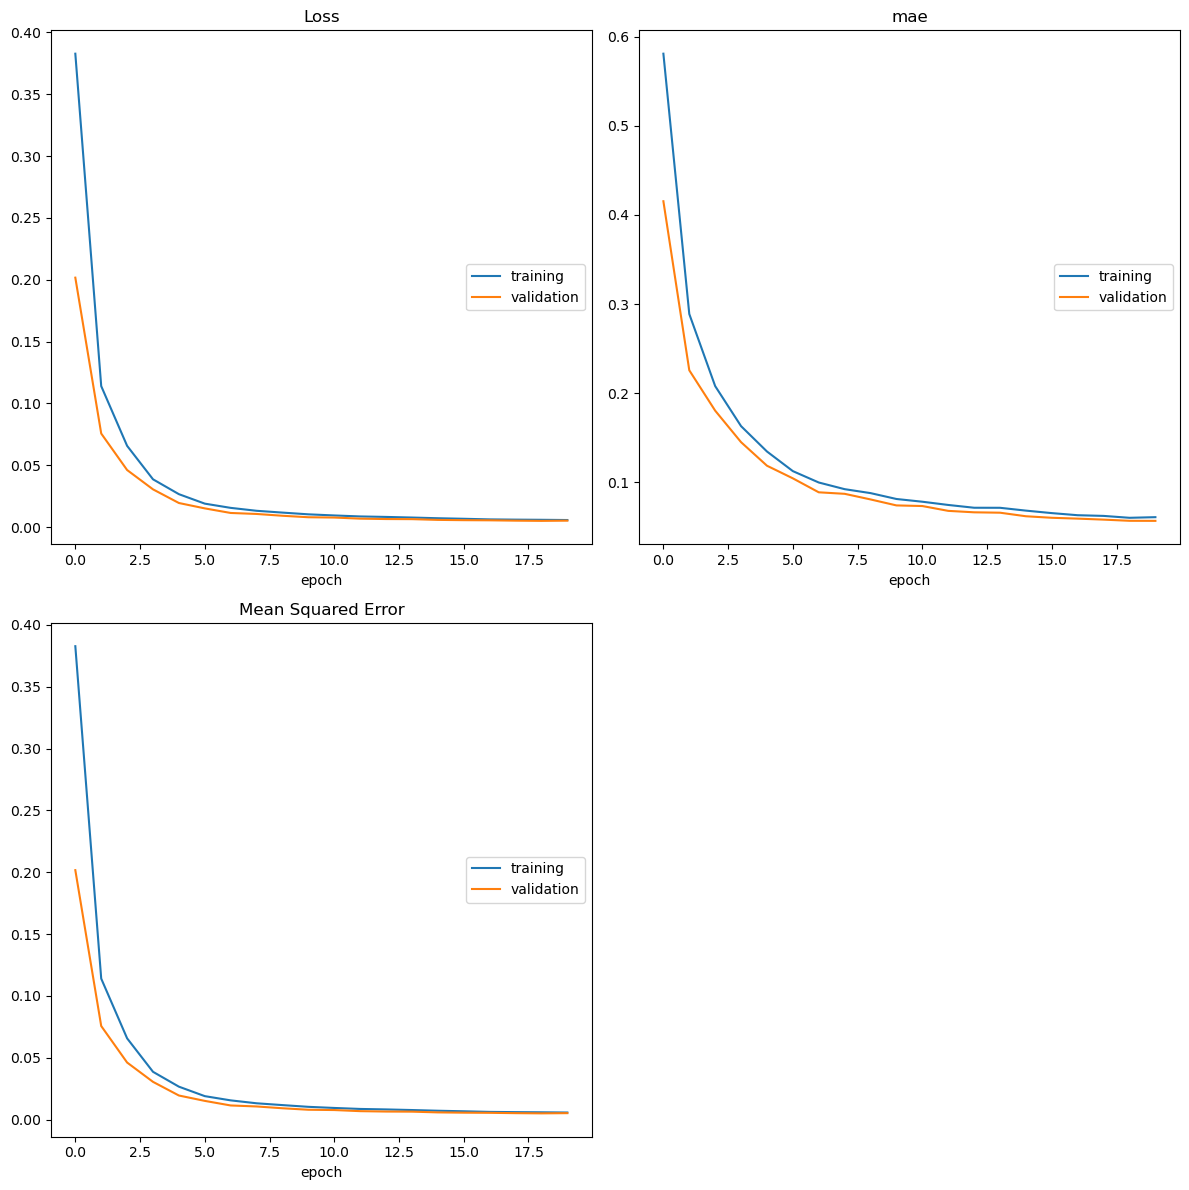

Loss
	training         	 (min:    0.006, max:    0.383, cur:    0.006)
	validation       	 (min:    0.005, max:    0.202, cur:    0.005)
mae
	training         	 (min:    0.060, max:    0.581, cur:    0.061)
	validation       	 (min:    0.057, max:    0.415, cur:    0.057)
Mean Squared Error
	training         	 (min:    0.006, max:    0.383, cur:    0.006)
	validation       	 (min:    0.005, max:    0.202, cur:    0.005)
5/5 [==============================] - 0s 6ms/step - loss: 0.0062 - mae: 0.0625 - mse: 0.0062
Mean Absolute Error (MAE): 0.0625 | Mean Squared Error (MSE): 0.0062


In [9]:
# Limpiamos la sesión para no ocupar tanta memoria
K.clear_session()

# Definimos una red neuronal con la función Sequential()
model = Sequential()

# Separación de datos de entrenamiento para considerar un set de validación durante entrenamiento
xTrain, xVal, yTrain, yVal = train_test_split(xTrain, yTrain, test_size=0.15, random_state=42)

# Definimos dos capas densas con un tamaño de salida de igual a output_var y un input_shape de dims
model.add(Dense(512, input_shape=(dims,), activation='relu'))
model.add(Dense(256, activation='linear'))
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Entrenamos la red neuronal con 20 épocas
model.fit(xTrain, yTrain, verbose=1, epochs=20, validation_data=(xVal, yVal), callbacks=[PlotLossesKeras()])

loss, mae, mse = model.evaluate(xTest, yTest)
print(f"Mean Absolute Error (MAE): {mae:.4f} | Mean Squared Error (MSE): {mse:.4f}")


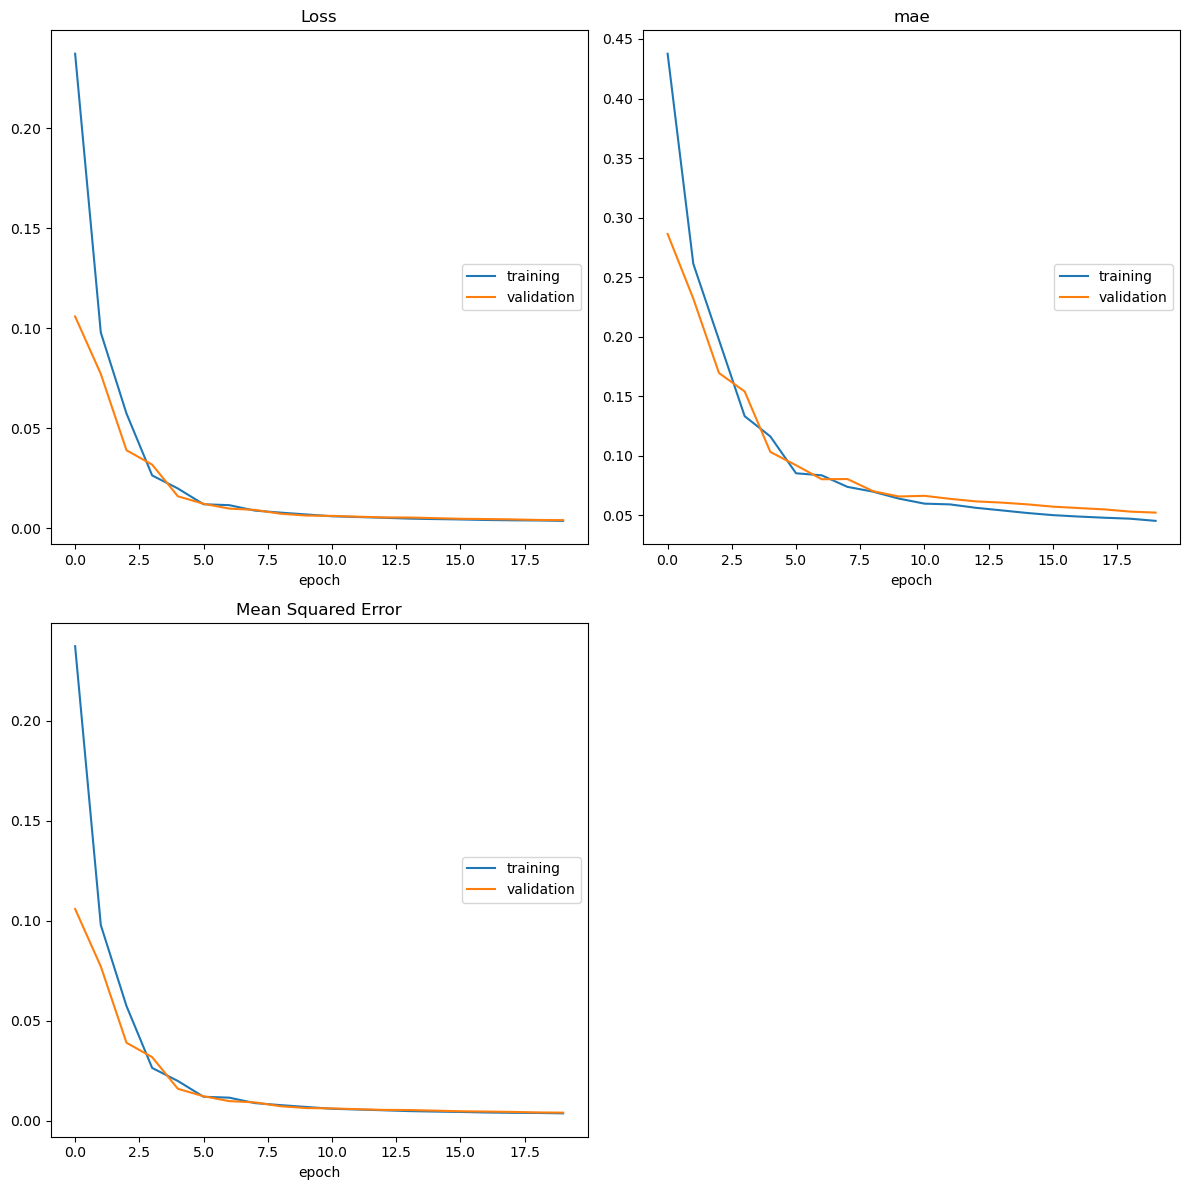

Loss
	training         	 (min:    0.004, max:    0.237, cur:    0.004)
	validation       	 (min:    0.004, max:    0.106, cur:    0.004)
mae
	training         	 (min:    0.045, max:    0.438, cur:    0.045)
	validation       	 (min:    0.052, max:    0.286, cur:    0.052)
Mean Squared Error
	training         	 (min:    0.004, max:    0.237, cur:    0.004)
	validation       	 (min:    0.004, max:    0.106, cur:    0.004)
5/5 [==============================] - 0s 4ms/step - loss: 0.0051 - mae: 0.0538 - mse: 0.0051
Mean Absolute Error (MAE): 0.0538 | Mean Squared Error (MSE): 0.0051


In [16]:
# Limpiamos la sesión para no ocupar tanta memoria
K.clear_session()

# Definimos una red neuronal con la función Sequential()
model = Sequential()

# Separación de datos de entrenamiento para considerar un set de validación durante entrenamiento
xTrain, xVal, yTrain, yVal = train_test_split(xTrain, yTrain, test_size=0.15, random_state=42)

# Definimos dos capas densas con un tamaño de salida de igual a output_var y un input_shape de dims
model.add(Dense(512, input_shape=(dims,), activation='relu'))
model.add(Dense(output_var, activation='linear')) # ¿La segunda capa debe ir con el valor predicho?
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Entrenamos la red neuronal con 20 épocas
model.fit(xTrain, yTrain, verbose=1, epochs=20, validation_data=(xVal, yVal), callbacks=[PlotLossesKeras()])

loss, mae, mse = model.evaluate(xTest, yTest)
print(f"Mean Absolute Error (MAE): {mae:.4f} | Mean Squared Error (MSE): {mse:.4f}")

In [20]:
# Predicciones
yPred = model.predict(xTest)

for i in range(5):
 print("Valor = %s, Predicción=%s" % (yTest[i], yPred[i]))

5/5 [==============================] - 0s 4ms/step
Valor = 0.73, Predicción=[0.7675524]
Valor = 0.92, Predicción=[0.9371393]
Valor = 0.7, Predicción=[0.68858093]
Valor = 0.76, Predicción=[0.6977535]
Valor = 0.86, Predicción=[0.8836899]


# Comentarios

> - ❓Es necesario hacer de nuevo una particion del set entreniamento y de validacion? Sí, por ser una red multicapa se necesita para tener un conjunto de validación durante el entrenamiento.

> - Se optó por usar el optimizador Adam (Adaptive Moment Estimation), el cual es una extensión del de descenso de gradiente estocástico (SGD), que utiliza una estimación adaptativa de los momentos de primer y segundo orden para adaptar la tasa de aprendizaje a cada parámetro del modelo. Esto puede ayudar al modelo a converger más rápidamente y a evitar quedar atrapado en mínimos locales

> - También se optó por usar un mayor número de neuronas en las dos capas (512 y 256 respectivamente) evidenciando de esta manera que menos epoch fueron necesarias.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

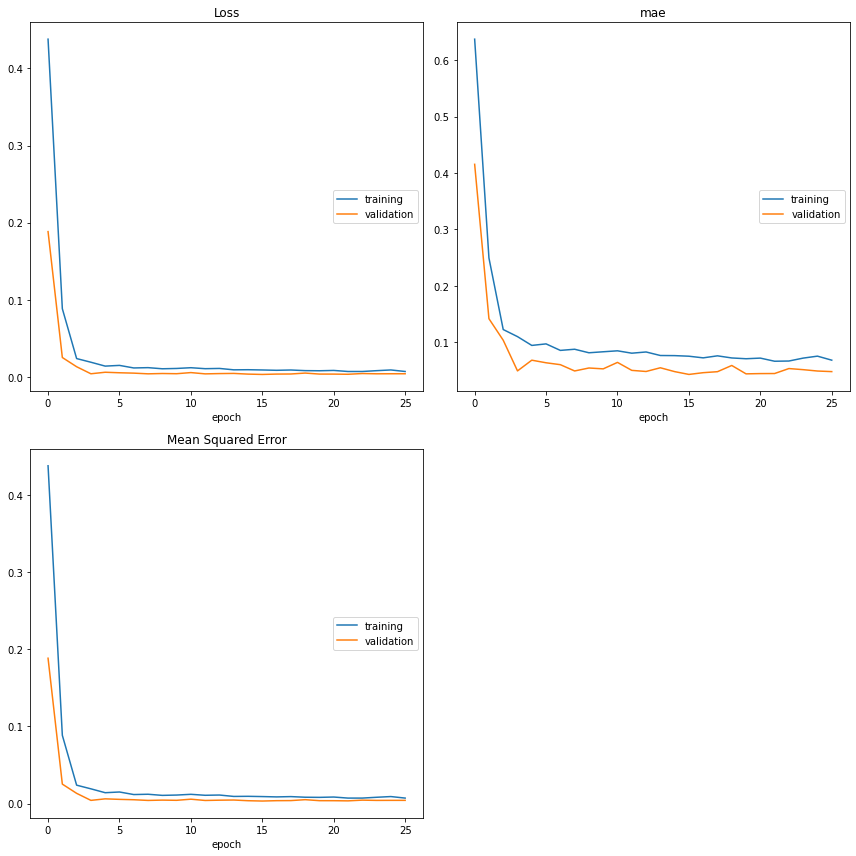

Loss
	training         	 (min:    0.007, max:    0.438, cur:    0.007)
	validation       	 (min:    0.003, max:    0.188, cur:    0.004)
mae
	training         	 (min:    0.066, max:    0.637, cur:    0.068)
	validation       	 (min:    0.043, max:    0.415, cur:    0.048)
Mean Squared Error
	training         	 (min:    0.007, max:    0.438, cur:    0.007)
	validation       	 (min:    0.003, max:    0.188, cur:    0.004)
5/5 [==============================] - 0s 3ms/step - loss: 0.0042 - mae: 0.0480 - mse: 0.0042
Mean Absolute Error (MAE): 0.0480 | Mean Squared Error (MSE): 0.0042


In [54]:
# Celda 3

# Capa 1
model.add(Dense(128, input_dim=dims, activation='relu'))
model.add(Dropout(0.2)) # ⚠️ Falta averiguar con tutores cómo funciona dropout

# Capa 2
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

# Capa de salida
model.add(Dense(1, activation='linear'))


model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
early_stop = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(xTrain, yTrain, batch_size=32, epochs=1000, validation_data=(xTest, yTest), callbacks=[PlotLossesKeras(), early_stop])
loss, mae, mse = model.evaluate(xTest, yTest)
print(f"Mean Absolute Error (MAE): {mae:.4f} | Mean Squared Error (MSE): {mse:.4f}")

In [57]:
len(history.epoch)

26

> - A pesar de establecer 1000 epochs, solo fueron necesarias 26 para converger en el modelo

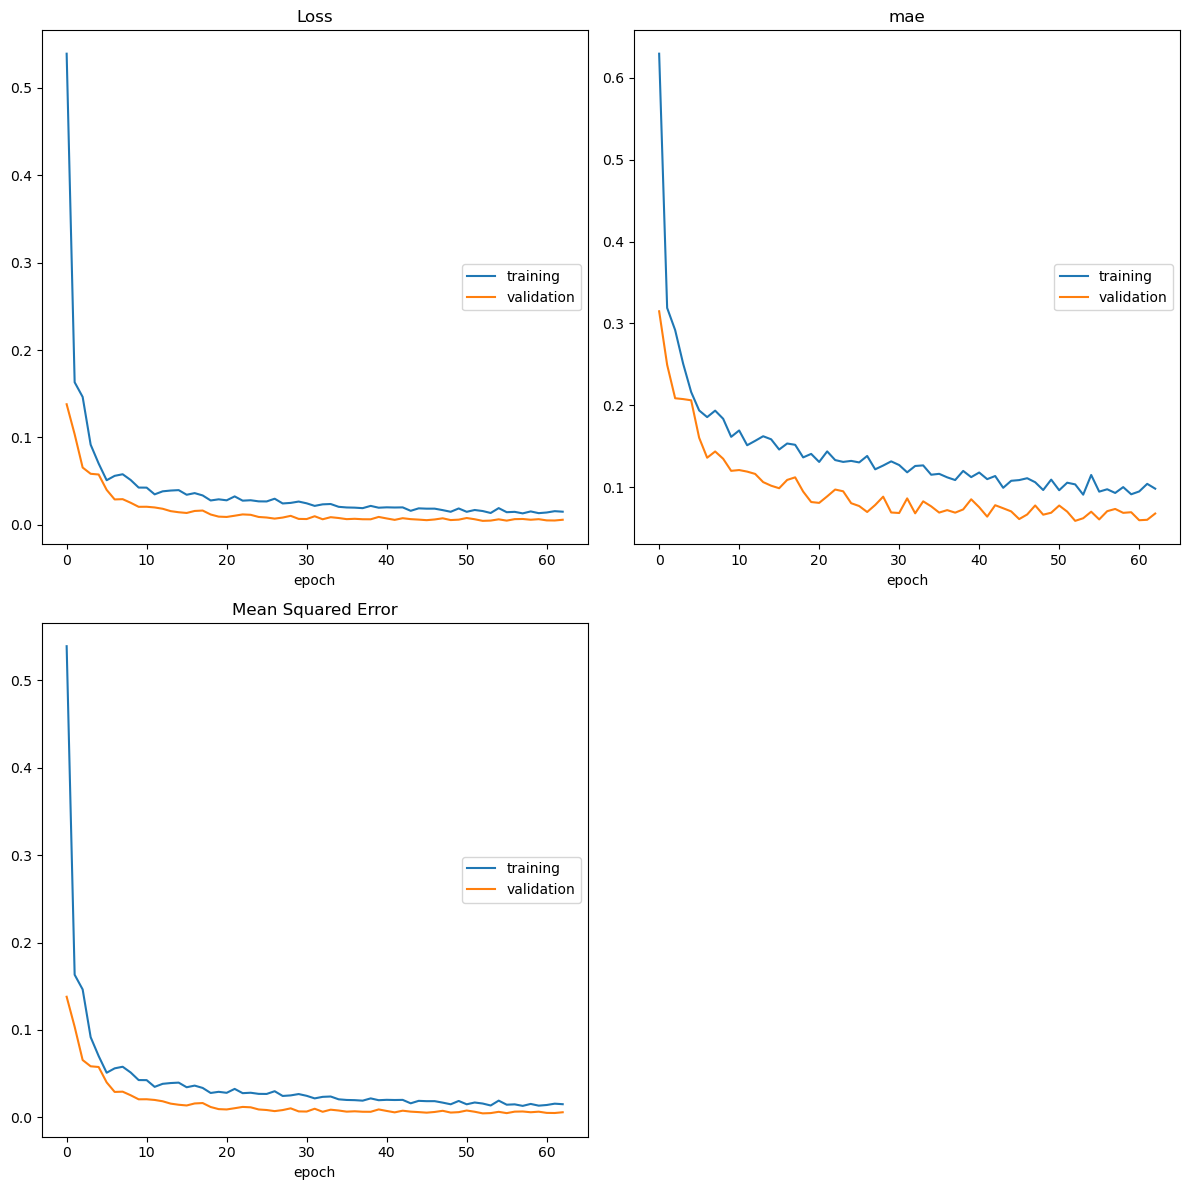

Loss
	training         	 (min:    0.013, max:    0.539, cur:    0.015)
	validation       	 (min:    0.005, max:    0.138, cur:    0.006)
mae
	training         	 (min:    0.091, max:    0.630, cur:    0.098)
	validation       	 (min:    0.059, max:    0.315, cur:    0.068)
Mean Squared Error
	training         	 (min:    0.013, max:    0.539, cur:    0.015)
	validation       	 (min:    0.005, max:    0.138, cur:    0.006)
5/5 [==============================] - 0s 4ms/step - loss: 0.0058 - mae: 0.0637 - mse: 0.0058
Mean Absolute Error (MAE): 0.0637 | Mean Squared Error (MSE): 0.0058


In [23]:
from tensorflow.keras.constraints import MaxNorm

# Limpiamos la sesión para no ocupar tanta memoria
K.clear_session()

# Definimos una red neuronal con la función Sequential()
model = Sequential()

# Capa 1
model.add(Dense(128, input_shape=(dims,), activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2)) # https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

# Capa 2
model.add(Dense(64, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2)) #Mantuve el 20 % por lo mencionado en el enlace

# Capa de salida
model.add(Dense(output_var, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# Entrenamos la red neuronal con 1000 épocas un batch zise de 32
history = model.fit(xTrain, yTrain, batch_size=32, epochs=1000, validation_data=(xVal, yVal), callbacks=[PlotLossesKeras(), early_stop])

# Evaluamos el desempeño del modelo
loss, mae, mse = model.evaluate(xTest, yTest)
print(f"Mean Absolute Error (MAE): {mae:.4f} | Mean Squared Error (MSE): {mse:.4f}")

In [24]:
len(history.epoch)

63

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [ ]:
# Celda 4
